# Problem Statement:
- Task 1: Prepare a complete data analysis report on the given data.
- Task 2: Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.
- Task 3: Analyze various techniques like Data Augmentation, etc and create a report on that.
# Dataset description:
- The dataset contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.
- Classes: -- Leaf smut -- Brown spot -- Bacterial leaf blightClasses: -- Leaf smut -- Brown spot -- Bacterial leaf blight

# About Rice Leaf

Rice leaf, refers to the leaves of the rice plant (Oryza sativa), which is one of the most important staple crops in the world. Rice leaves play a crucial role in the growth and development of the rice plant, and they are also of significant importance in agriculture and plant science. Here's more information about rice leaves:

1. **Plant Anatomy**: Rice leaves are a fundamental part of the rice plant's anatomy. They are typically elongated and have a blade-like shape. The leaves are attached to the stem of the plant by a leaf sheath.

2. **Photosynthesis**: Like leaves of other plants, rice leaves are primarily responsible for photosynthesis. During photosynthesis, they capture sunlight and convert it into chemical energy in the form of sugars and starches, which are essential for the plant's growth and development.

3. **Green Color**: Rice leaves are green due to the presence of chlorophyll, a pigment that plays a key role in photosynthesis. Chlorophyll absorbs sunlight, allowing the plant to capture energy from the sun.

4. **Transpiration**: Rice leaves also participate in transpiration, the process by which water is absorbed through the roots and then released into the atmosphere through small openings called stomata on the leaf surface. This process helps maintain the plant's hydration and facilitates the movement of nutrients from the roots to the rest of the plant.

5. **Variability**: There is some variability in the appearance of rice leaves depending on the rice variety or cultivar. Variations in leaf shape, size, color, and texture can be observed among different rice varieties.

6. **Disease and Pest Management**: Rice leaves are susceptible to various diseases and pests, which can have a significant impact on rice production. Common rice leaf diseases include blast, sheath blight, and bacterial leaf blight. Pest infestations, such as those by the brown planthopper and leafhoppers, can also affect rice leaves.

7. **Agricultural Importance**: In agriculture, the appearance and health of rice leaves are important indicators of the plant's overall condition. Farmers and agronomists often monitor rice leaves for signs of stress, disease, or nutrient deficiencies to take appropriate measures and optimize crop yields.

8. **Research and Study**: Rice leaves are a subject of extensive research in plant science and agriculture. Scientists study rice leaves to understand photosynthesis, nutrient uptake, disease resistance, and other aspects of rice plant physiology. This research contributes to the development of improved rice varieties and more sustainable agricultural practices.

9. **Rice in Global Food Security**: Rice is a staple food for billions of people worldwide, particularly in Asia. Rice leaves play a vital role in the production of rice grains, which are a primary source of calories and nutrition for many populations. Ensuring the health of rice leaves is essential for global food security.


Bacterial Leaf Blight (BLB), Brown Spot, and Leaf Smut are three distinct diseases that affect rice plants, each caused by different pathogens. Here's an overview of each of these rice leaf diseases:

1. **Bacterial Leaf Blight (BLB):**
   - **Causal Agent:** Bacterial Leaf Blight is caused by the bacterium *Xanthomonas oryzae* pv. *oryzae* (Xoo).
   - **Symptoms:** BLB typically manifests as water-soaked lesions on rice leaves. These lesions later turn yellowish to brown and can lead to wilting and drying of the affected leaves. They often appear as streaks on the leaves.
   - **Transmission:** Xoo is primarily spread through infected seeds, water, and mechanical means.
   - **Management:** Management strategies include planting resistant rice varieties, crop rotation, seed treatment, water management, and sanitation.

2. **Brown Spot:**
   - **Causal Agent:** Brown Spot is caused by the fungus *Bipolaris oryzae* (formerly known as *Helminthosporium oryzae*).
   - **Symptoms:** Brown Spot is characterized by small, oval-shaped, dark brown to black lesions with a yellowish halo on rice leaves. These lesions may coalesce, leading to extensive leaf damage.
   - **Transmission:** The fungus can survive on crop residues and is spread through wind, rain, and irrigation water.
   - **Management:** Fungicide application, crop rotation, and resistant rice varieties are used to manage Brown Spot.

3. **Leaf Smut:**
   - **Causal Agent:** Leaf Smut is caused by the fungus *Tilletia barclayana* (formerly known as *Tilletia horrida*).
   - **Symptoms:** Leaf Smut primarily affects the leaves of rice plants. Infected leaves show abnormal growth, becoming swollen and distorted. Eventually, the fungal spores break through the leaf surface, releasing a dark, powdery mass of spores.
   - **Transmission:** The disease is primarily spread through infected seeds.
   - **Management:** Seed treatment with fungicides and planting of disease-free seeds are common methods to control Leaf Smut.

These three diseases can lead to yield losses in rice crops if not managed properly. Effective disease management often involves a combination of cultural practices, such as planting resistant varieties, good agricultural practices, and, in some cases, chemical control measures. Disease-resistant rice varieties have been developed to reduce the impact of these diseases, and research continues to seek improved control methods and management strategies to protect rice crops from these pathogens.

## Outline

- Import the libraries and the dataset
- Image visualization
- Rescaling the pixel image
- Dividing data into training and validation set
- Model architecture
- Model compilation
- Model training
- Load the Model with best validation accuracy
- Visualize some predictions

# 1. Import Libraries


In [6]:
# basics
import pandas as pd
import numpy as np 
import tensorflow as tf
import keras
import os


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# utility & processing
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from PIL import Image

# CNN architecture
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout

# callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# data augumentation
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

# 2. Import/Load image dataset

In [7]:
input_shape_2D = (224,224)
input_shape_3D = (224,224,3)
seed = 1
batch_size = 32
epochs = 30
stopper = EarlyStopping(patience = 5)

In [8]:
img_data = tf.keras.utils.image_dataset_from_directory(
    directory =r'C:\Users\Nuel\Downloads\Rice Leaf data',
    labels = 'inferred',
    label_mode = 'int',
    class_names = None,
    color_mode = 'rgb',
    batch_size = None,
    image_size = input_shape_2D,
    seed = seed)

Found 119 files belonging to 3 classes.


In [9]:
# class labels

class_names = img_data.class_names

print('Class Names: ', class_names)

Class Names:  ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


# 3. Image Visualization

In [10]:
def show_images(images, labels):
    fig, axes = plt.subplots(8,4, figsize = (10,10))
    axes = axes.flatten()
    for i, (img, label) in enumerate(zip(images, labels)):
        axes[i].imshow(img.numpy().astype('uint8'))
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

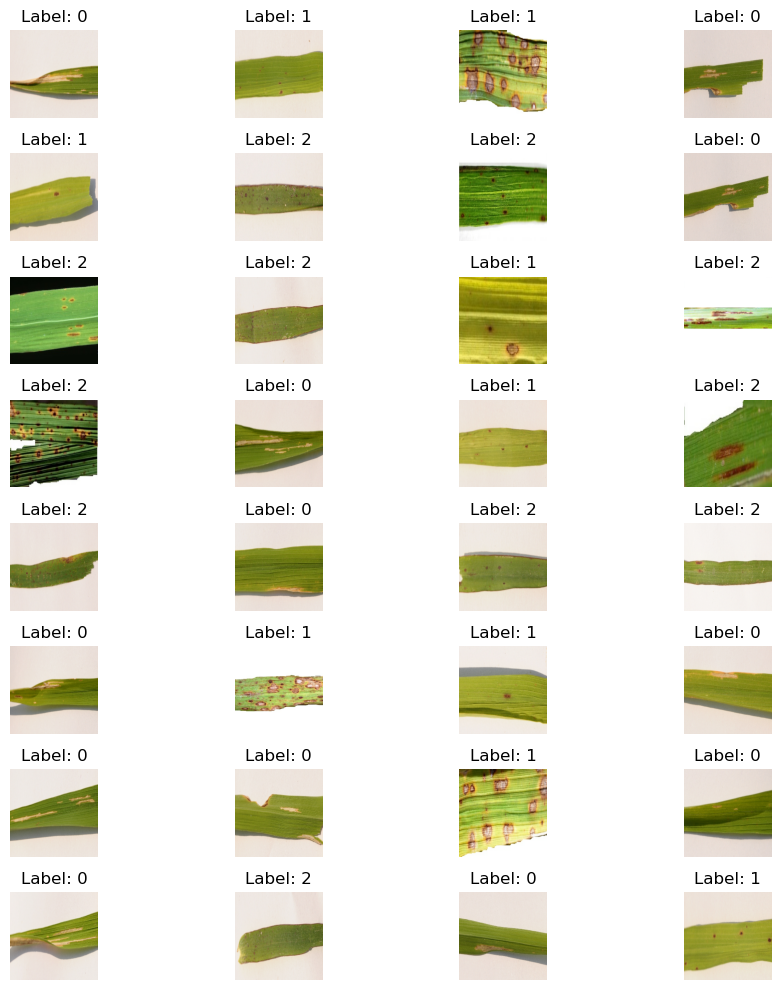

In [11]:
# displaying image batch of 32
batch_data = img_data.batch(batch_size)

batch = next(iter(batch_data))
images, labels = batch

show_images(images, labels)

# 4. Data Processing

In [12]:
x = []
y = []

for image, label in img_data.batch(119):
    for img, lab in zip(image,label):
        x.append(img)
        y.append(lab.numpy())

In [13]:
# converting to numpy array

x = np.array(x)
y = np.array(y)

In [14]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

## 4.1 Normalizing the data

- Normalizing image data refers to the process of transforming the pixel values of an image so that they fall within a standardized and consistent range. This is done to make the data more suitable for training machine learning models and to improve the model's convergence during training. Here's what normalizing image data means:  In most cases, pixel values in images are represented as integers in the range of 0 to 255 for each color channel (e.g., red, green, blue in an RGB image). Normalization typically involves scaling these values to a smaller range, often between 0 and 1 or -1 and 1. Scaling to a smaller range helps in avoiding issues like vanishing gradients during neural network training.

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
print('shape of x_train_scaled: ', x_train.shape)
print('shape of y_train: ', y_train.shape)
print('shape of x_test_scaled: ', x_test.shape)
print('shape of y_test: ', y_test.shape)

shape of x_train_scaled:  (95, 224, 224, 3)
shape of y_train:  (95,)
shape of x_test_scaled:  (24, 224, 224, 3)
shape of y_test:  (24,)


## 4.2 Encoding

In [17]:
y_train = to_categorical(y_train, num_classes = len(class_names))
y_test = to_categorical(y_test, num_classes = len(class_names))

# 5. Defining the  Model Architecture

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()

# adding first convolution layer
model.add(Conv2D(filters = 16, kernel_size = 2, padding ='same', activation ='relu', 
                 input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size = 2))


# adding second convolution layer
model.add(Conv2D(filters = 32, kernel_size = 2, padding ='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))


# adding third convolution layer
model.add(Conv2D(filters = 64, kernel_size = 2, padding ='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.3))

# adding flatten layer
model.add(Flatten())

# adding fully connected layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

# adding output layer: number of classes = 3
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 64)       

# 6. Compile the model

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

# 7. Train the model

In [94]:
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 3, save_best_only=True)

history = model.fit(x_train,y_train,epochs = epochs, batch_size = 32, validation_data = (x_test,y_test), 
                   callbacks = [checkpointer, stopper], shuffle = True)

Epoch 1/30
3/3 [==============================] - ETA: 0s - loss: 16.9324 - accuracy: 0.3684
Epoch 1: val_loss improved from inf to 8.15361, saving model to model.weights.best.hdf5
3/3 [==============================] - 4s 1s/step - loss: 16.9324 - accuracy: 0.3684 - val_loss: 8.1536 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - ETA: 0s - loss: 5.1670 - accuracy: 0.2842
Epoch 2: val_loss improved from 8.15361 to 1.15351, saving model to model.weights.best.hdf5
3/3 [==============================] - 4s 2s/step - loss: 5.1670 - accuracy: 0.2842 - val_loss: 1.1535 - val_accuracy: 0.3333
Epoch 3/30
3/3 [==============================] - ETA: 0s - loss: 1.1504 - accuracy: 0.4211
Epoch 3: val_loss improved from 1.15351 to 1.02922, saving model to model.weights.best.hdf5
3/3 [==============================] - 3s 1s/step - loss: 1.1504 - accuracy: 0.4211 - val_loss: 1.0292 - val_accuracy: 0.5417
Epoch 4/30
3/3 [==============================] - ETA: 0s - loss: 1.1241

3/3 [==============================] - 2s 806ms/step - loss: 0.2690 - accuracy: 0.9368 - val_loss: 0.5729 - val_accuracy: 0.7083
Epoch 30/30
3/3 [==============================] - ETA: 0s - loss: 0.2340 - accuracy: 0.9684
Epoch 30: val_loss improved from 0.52177 to 0.48172, saving model to model.weights.best.hdf5
3/3 [==============================] - 3s 1s/step - loss: 0.2340 - accuracy: 0.9684 - val_loss: 0.4817 - val_accuracy: 0.7500


# 7.1. Visualizing model performance

In [95]:
def plot_performance(model_name, acc,val_acc, loss, val_loss): 
    plt.figure(figsize=(12,6))
    
    plt.subplot(1,2,1)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('{} : Loss'.format(model_name), fontsize=13, fontweight='bold')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train','val'], loc = 'upper right')
    
    plt.subplot(1,2,2)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('{} : Accuracy'.format(model_name), fontsize = 12, fontweight='bold')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train','val'], loc = 'upper right')
    
    plt.tight_layout()
    plt.show()
    

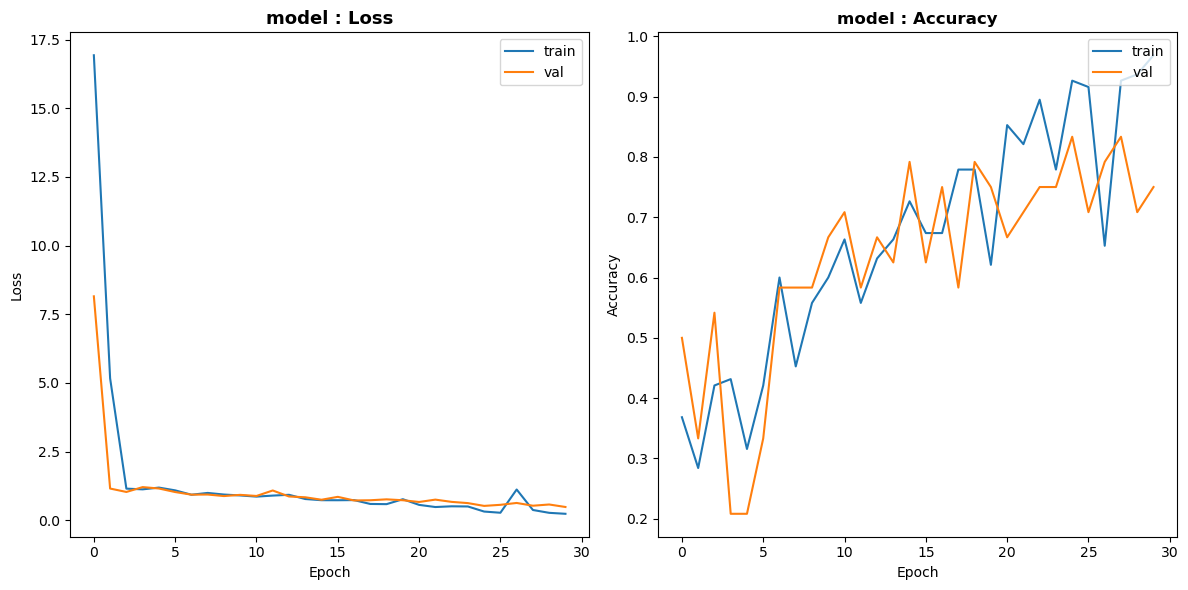

In [96]:
plot_performance (model_name = 'model',
                 acc = history.history['accuracy'],
                 val_acc = history.history['val_accuracy'],
                 loss = history.history['loss'],
                 val_loss = history.history['val_loss'])

# 8. Load the base Model with the best validation accuracy

In [97]:
model.load_weights('model.weights.best.hdf5')

# 9. Visualize some predictions

In [98]:
# get predictions on the test set
y_pred = model.predict(x_test)

# define the text labels
labels = img_data.class_names

1/1 [==============================] - 0s 231ms/step


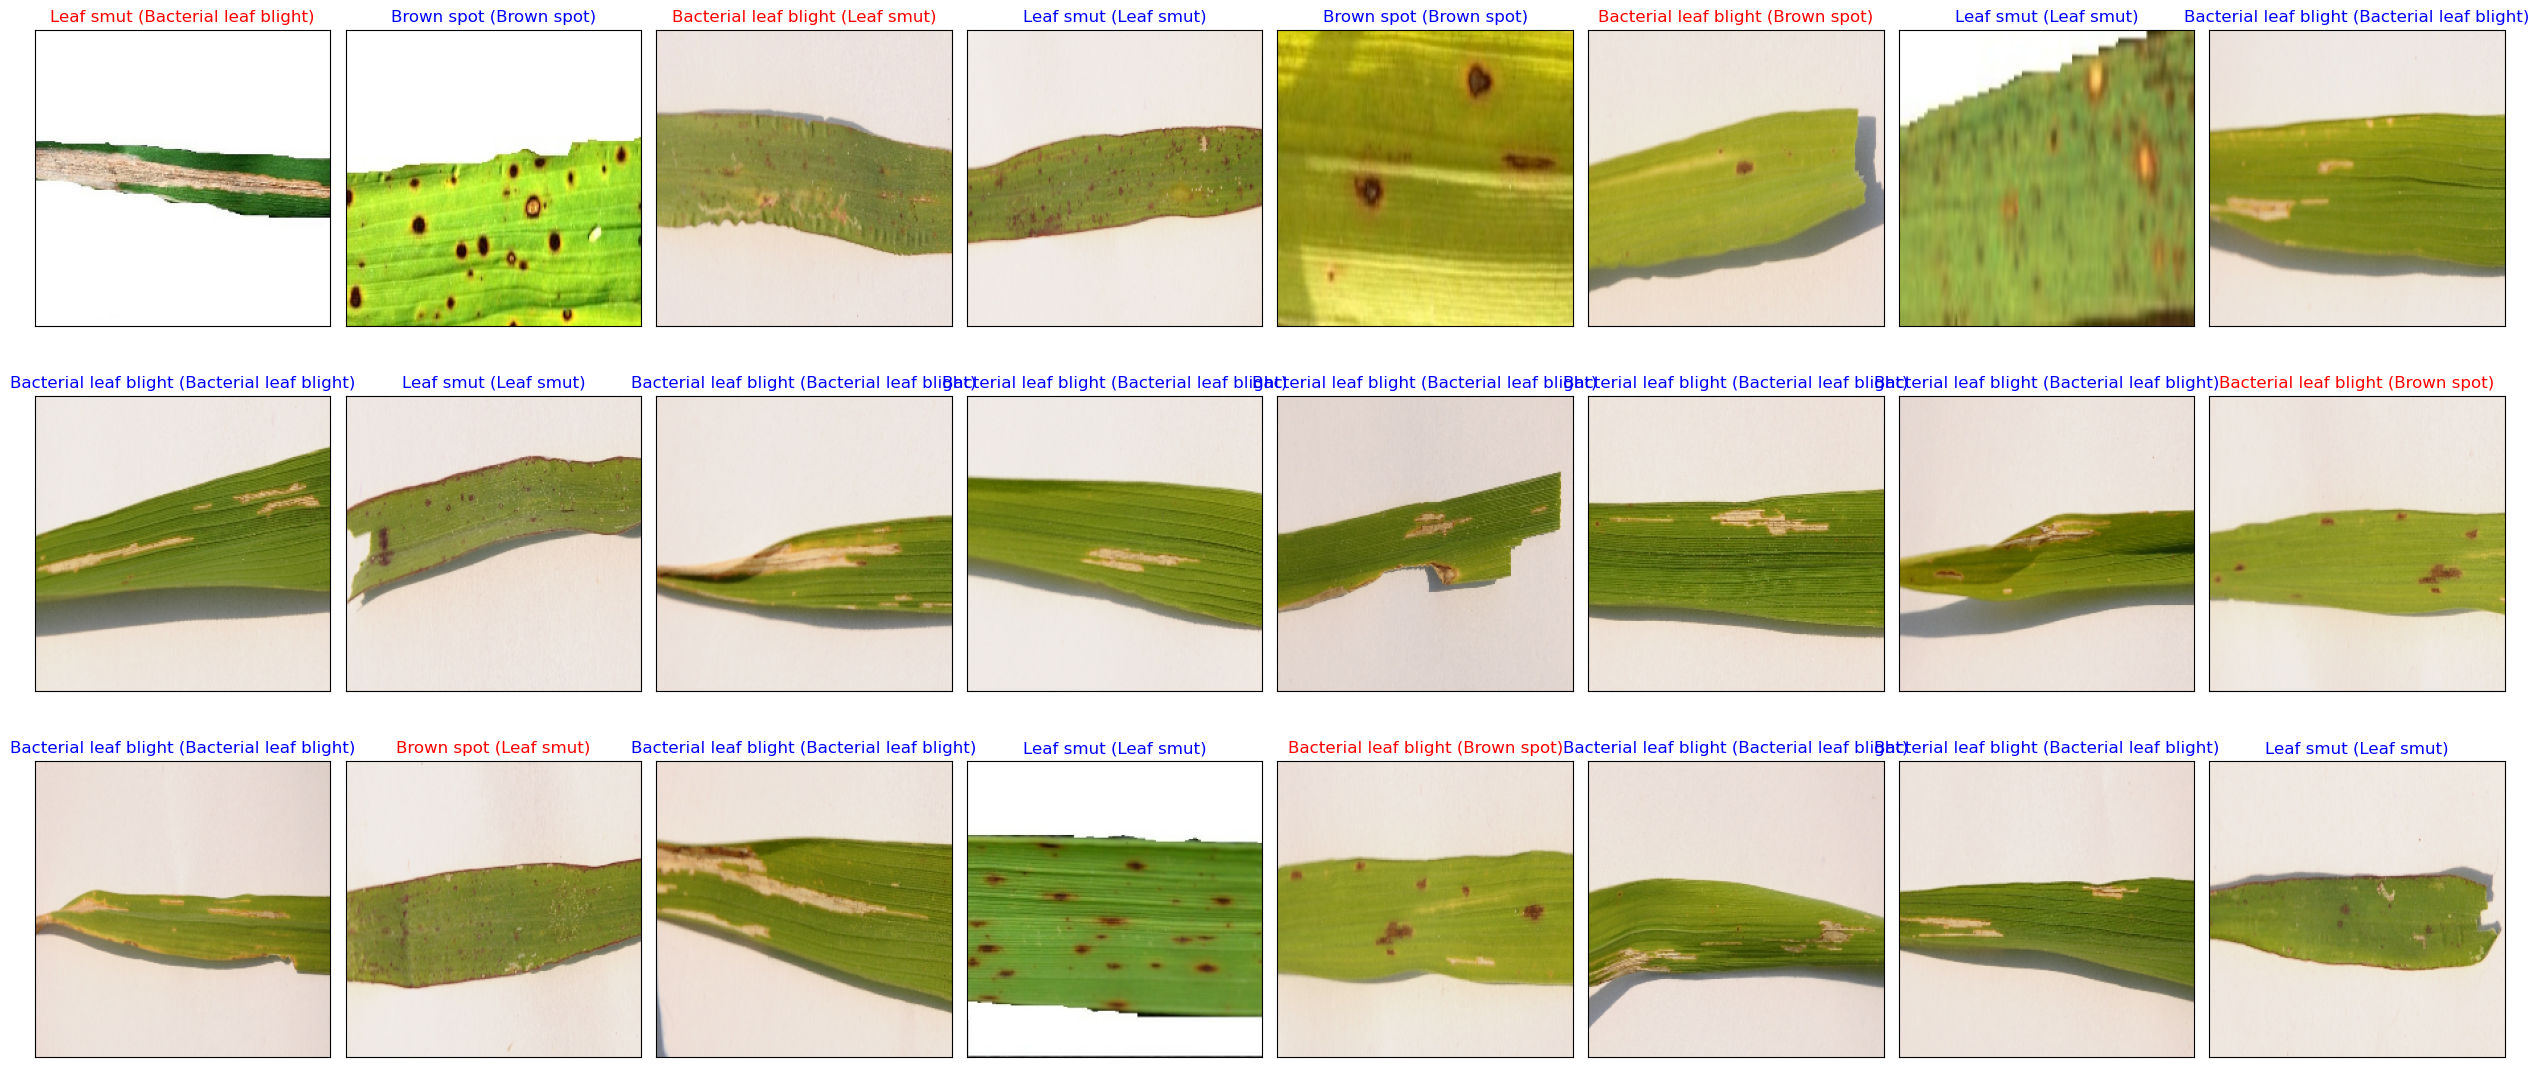

In [99]:
# plot a random samples of test images, their predicted labels, and groung truth
fig = plt.figure(figsize=(25,15))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size = 24, replace = False)):
    ax = fig.add_subplot(4, 8, i+1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                color = ('blue' if pred_idx == true_idx else 'red'))
plt.tight_layout()
plt.show()

# 10. Data Augmentation

- Data augmentation is a technique commonly used in machine learning and deep learning, especially in computer vision tasks like image classification, object detection, and image segmentation. It involves applying various transformations and modifications to the existing training data to create new, slightly modified versions of the data. The goal of data augmentation is to increase the diversity of the training dataset without collecting additional labeled examples manually. 

**Importance of Data Augmentation:**

1. **Increased Model Robustness:** Data augmentation helps improve the robustness of machine learning models. By exposing the model to a wider range of variations in the data, such as different orientations, positions, and scales, the model becomes more capable of handling real-world variations and noise in the input data.

2. **Reduced Overfitting:** Augmenting the training data with transformed versions of the original samples reduces the risk of overfitting. Overfitting occurs when a model becomes too specialized in learning the training data and performs poorly on unseen data. Data augmentation makes it harder for the model to memorize the training examples.

3. **Larger Effective Dataset:** Data augmentation effectively increases the size of the training dataset. A larger dataset can lead to better generalization, and it can be particularly valuable when you have limited labeled data.

**Common Data Augmentation Techniques:**

1. **Rotation:** Rotating images by a certain angle (e.g., 90 degrees) to simulate variations in object orientation.

2. **Horizontal and Vertical Flipping:** Flipping images horizontally or vertically to account for changes in object orientation.

3. **Translation:** Shifting the image horizontally or vertically to simulate changes in object position.

4. **Scaling and Zooming:** Scaling images up or down to simulate variations in object size and zooming in or out.

5. **Shearing:** Applying shear transformations to distort the image, simulating different perspectives.

6. **Color and Brightness Adjustments:** Changing the brightness, contrast, saturation, or color balance of images.

7. **Noise Injection:** Adding random noise to images to simulate real-world noise.

8. **Cropping:** Cropping and resizing images to different dimensions to focus on different parts of the image.

9. **Elastic Deformation:** Applying local deformations to images to simulate deformable objects.

**Implementation:**

Data augmentation is typically performed using libraries and frameworks like Keras, TensorFlow, PyTorch, or OpenCV. These libraries provide functions or classes that allow you to define and apply various augmentation techniques to your dataset during training.

By incorporating data augmentation into your training pipeline, you can create a more robust and effective machine learning model, especially when you have limited labeled data or when you want your model to perform well under different conditions and variations in the input data.

## 10.1 Creating Image Generator Object

In [100]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range = 40,
        width_shift_range = 0.3,
        height_shift_range=0.3,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest')

# 10.3 Training augmented data

In [101]:
augmented_data = datagen.flow(x_train,y_train,batch_size = 32)

In [102]:
checkpointer_aug = ModelCheckpoint(filepath = 'model_aug.weights.best.hdf5', verbose = 3, save_best_only = True)

aug_history = model.fit(augmented_data, validation_data = (x_test,y_test), 
                        steps_per_epoch = len(x_train)//batch_size,
                       epochs=30, callbacks = [stopper, checkpointer_aug])

Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 1.1929 - accuracy: 0.5156
Epoch 1: val_loss improved from inf to 0.74349, saving model to model_aug.weights.best.hdf5
2/2 [==============================] - 5s 3s/step - loss: 1.1929 - accuracy: 0.5156 - val_loss: 0.7435 - val_accuracy: 0.6250
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 1.3648 - accuracy: 0.4375
Epoch 2: val_loss improved from 0.74349 to 0.61642, saving model to model_aug.weights.best.hdf5
2/2 [==============================] - 3s 2s/step - loss: 1.3648 - accuracy: 0.4375 - val_loss: 0.6164 - val_accuracy: 0.8333
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 0.8957 - accuracy: 0.6190
Epoch 3: val_loss improved from 0.61642 to 0.60604, saving model to model_aug.weights.best.hdf5
2/2 [==============================] - 4s 3s/step - loss: 0.8957 - accuracy: 0.6190 - val_loss: 0.6060 - val_accuracy: 0.8333
Epoch 4/30
2/2 [==============================] - ETA: 0s - lo

# 10.4 Visualizing augmented model performance

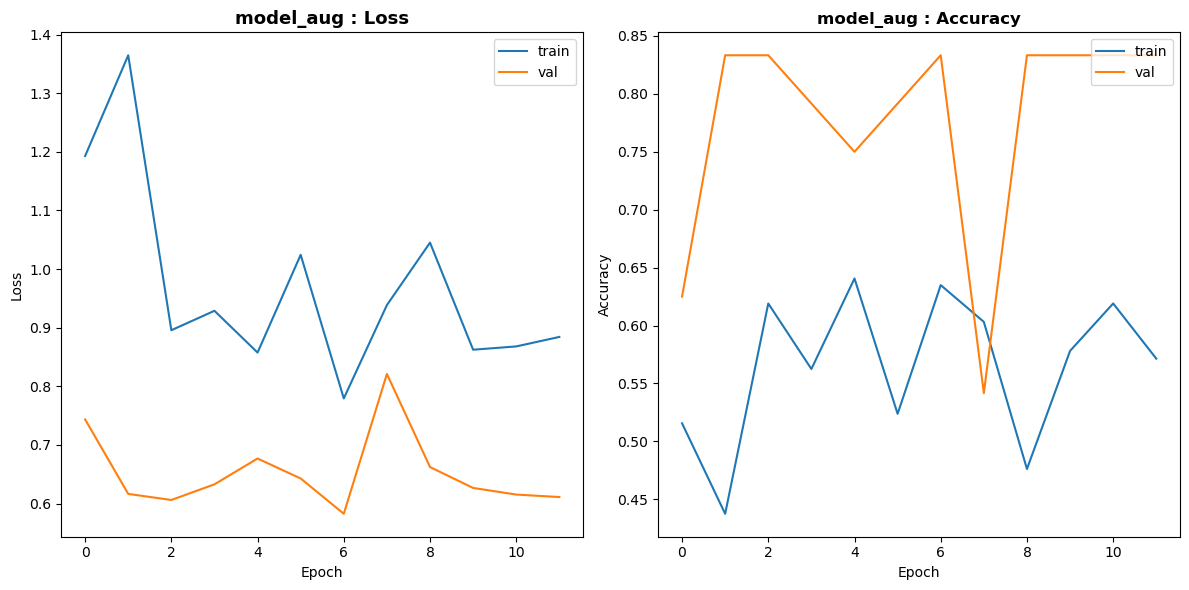

In [103]:
plot_performance(model_name = 'model_aug', 
                acc = aug_history.history['accuracy'],
                val_acc = aug_history.history['val_accuracy'],
                loss = aug_history.history['loss'],
                val_loss = aug_history.history['val_loss'])

# 10.5. Load the Model with the best validation accuracy

In [104]:
model.load_weights('model.weights.best.hdf5')

# 10.6 Visualize some predictions

In [105]:
# get predictions on the test set
y_pred = model.predict(x_test)

# define the text labels
labels = img_data.class_names

1/1 [==============================] - 0s 147ms/step


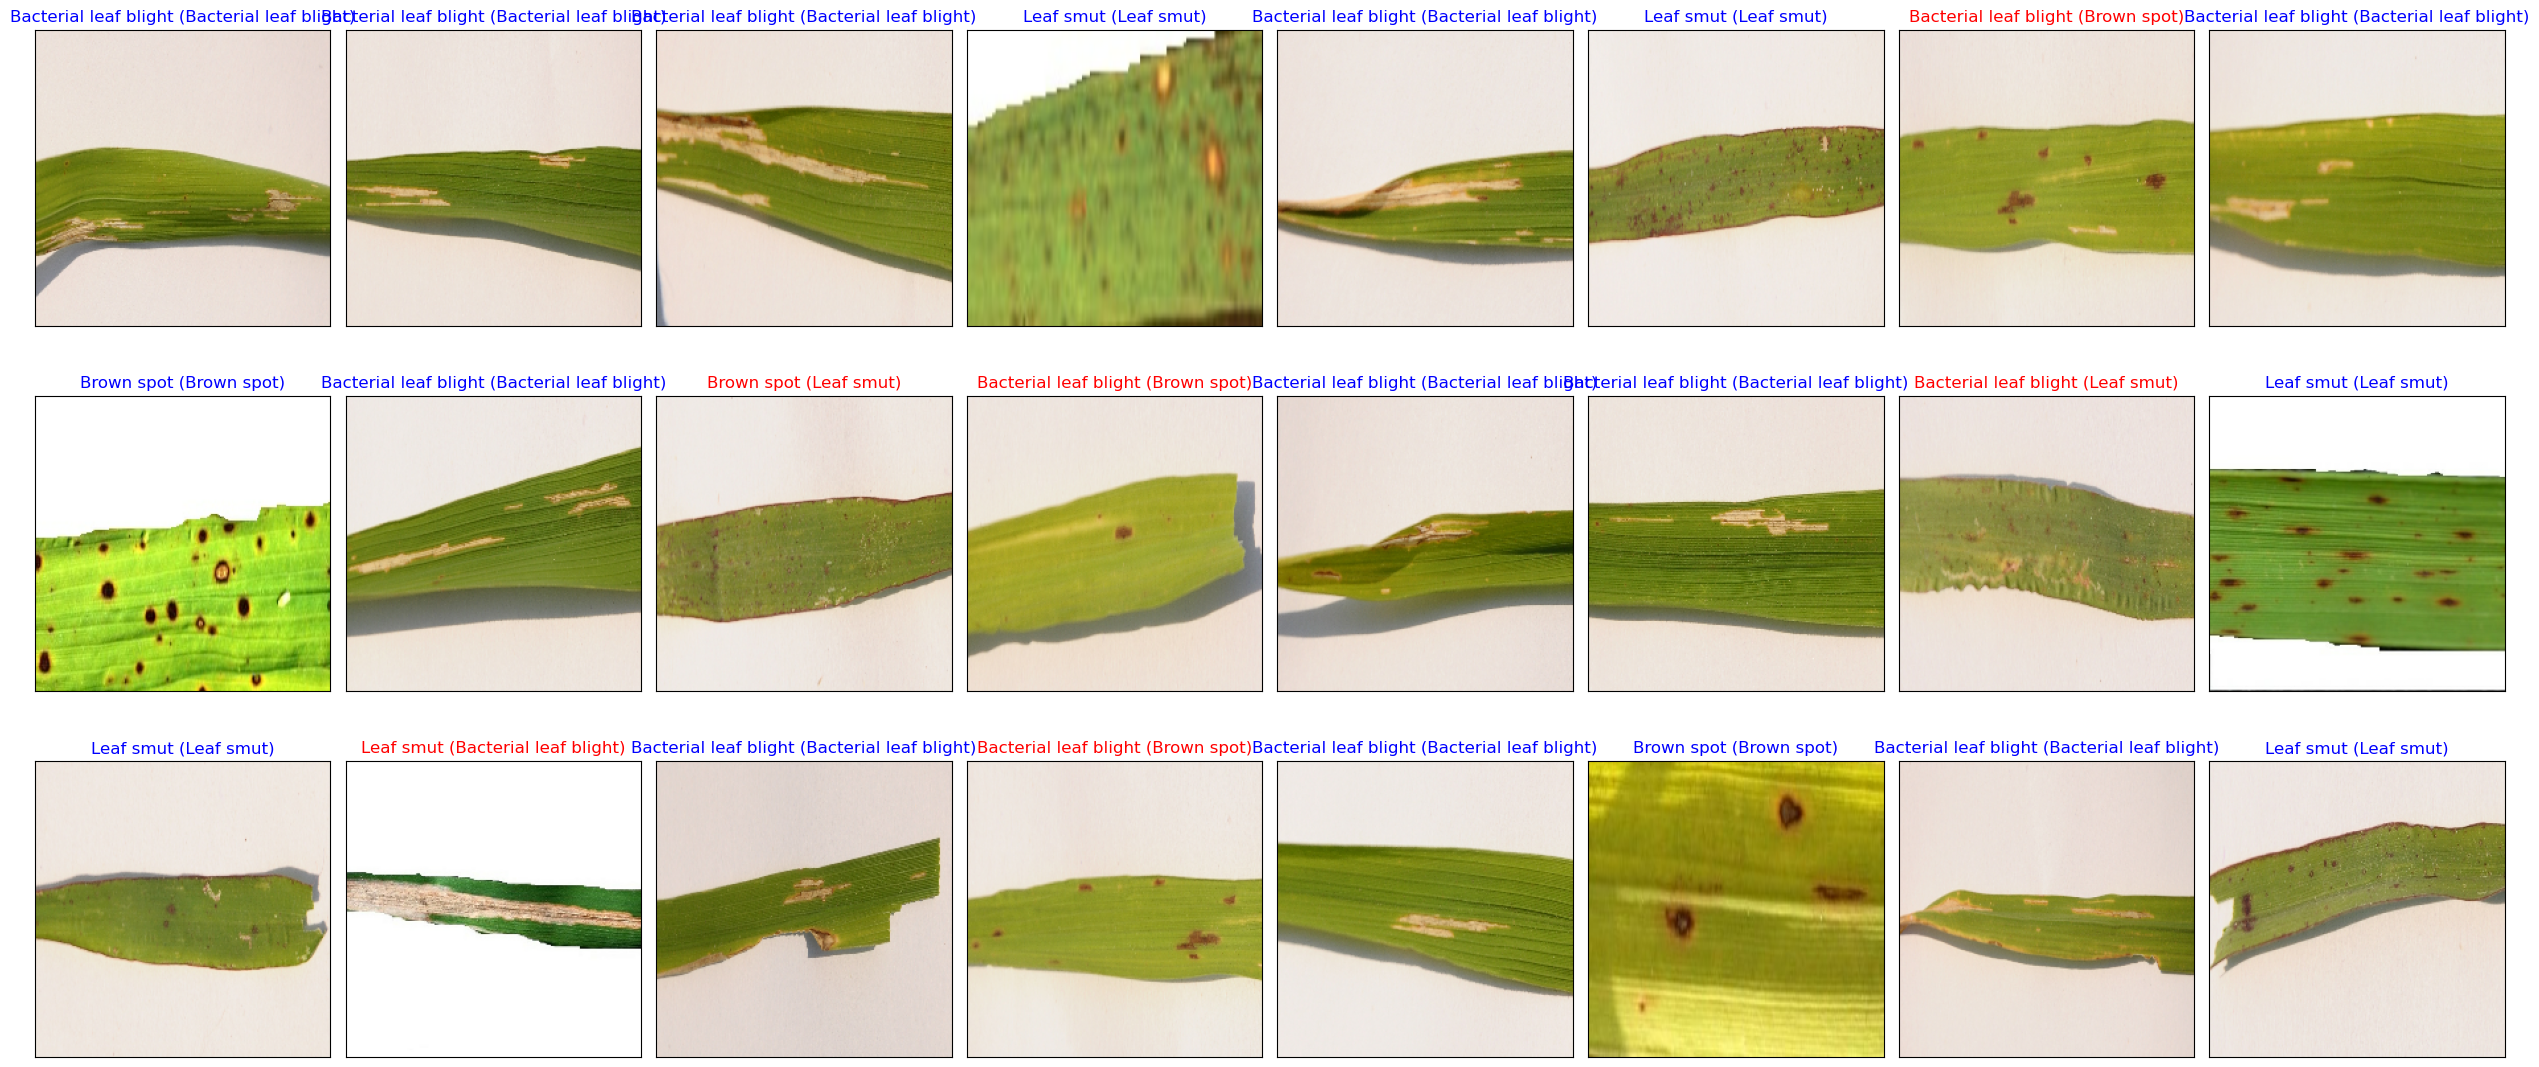

In [106]:
# plot a random samples of test images, their predicted labels, and groung truth
fig = plt.figure(figsize=(25,15))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size = 24, replace = False)):
    ax = fig.add_subplot(4, 8, i+1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                color = ('blue' if pred_idx == true_idx else 'red'))
plt.tight_layout()
plt.show()

# Conclusion

- The project encompassed the creation of a deep learning model designed to categorize images depicting various types of rice leaf diseases. The dataset comprised images representing three distinct rice leaf diseases: bacterial blight, brown spot, and leaf smut. The project was organized into multiple phases, which encompassed tasks such as data exploration, data preprocessing, the development and training of deep learning models, and the assessment of model performance.

- In the initial data exploration phase, I thoroughly examined the dataset and employed image visualization techniques to gain a more comprehensive understanding of its content. My observations revealed that the dataset has 119 images instead. Additionally, I observed variations in image dimensions, prompting the need for standardization by resizing all images to a uniform size of 224 X 224 prior to their utilization in the training process.

- In the data preprocessing stage, I carried out several crucial tasks. Firstly, I normalized the training dataset to ensure consistent scaling across all data points. Additionally, I encoded the labels to make them suitable for training. To enhance the dataset's diversity and mitigate overfitting, I harnessed Keras' ImageDataGenerator to create augmented images. Moreover, I resized the images and partitioned them into distinct sets for training, validation, and testing purposes.

- I constructed a Convolutional Neural Network (CNN) deep learning model and proceeded to train it using both the original dataset and the augmented dataset. I assessed the model's performance by examining metrics such as accuracy, loss, and the time required for each training epoch. Furthermore, I visually represented the training and validation curves, allowing us to scrutinize the models' behavior and performance trends throughout the training process.

- I noted that the custom model performaned fairly well when trained on the original dataset, but its performance did not show improvement when applied to the augmented dataset.

- In summary, the project achieved its objectives by developing a deep learning model capable of classifying images depicting rice leaf diseases. The project encompassed comprehensive tasks, including dataset exploration, data preprocessing, the construction and training of deep learning models, and performance evaluation. Additionally, I obtained valuable insights into the divergent behavior of models when trained on both standard and augmented data.




